In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import RobustScaler
import itertools
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier


In [85]:
data=pd.read_csv('16325569497737558.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [48]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

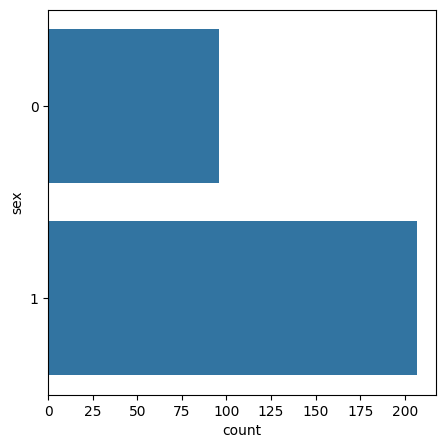

In [7]:
plt.figure(1,(5,5))
sns.countplot(data,y='sex')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

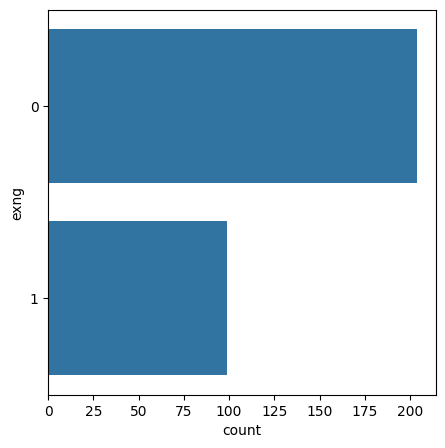

In [8]:
plt.figure(1,(5,5))
sns.countplot(data,y='exng')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

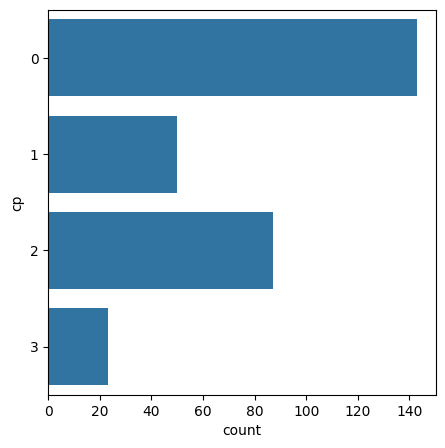

In [9]:
plt.figure(1,(5,5))
sns.countplot(data,y='cp')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

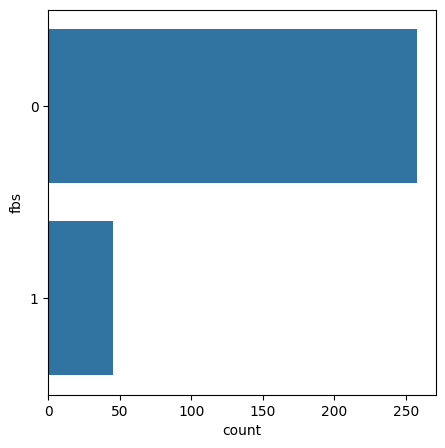

In [10]:
plt.figure(1,(5,5))
sns.countplot(data,y='fbs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

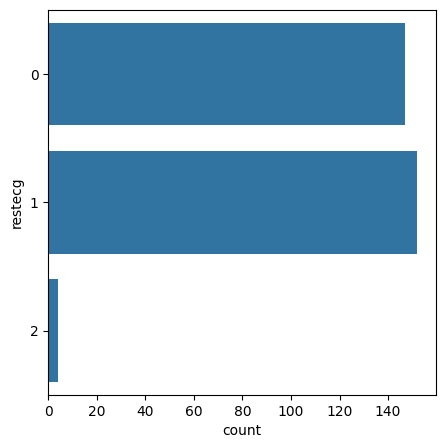

In [11]:
plt.figure(1,(5,5))
sns.countplot(data,y='restecg')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

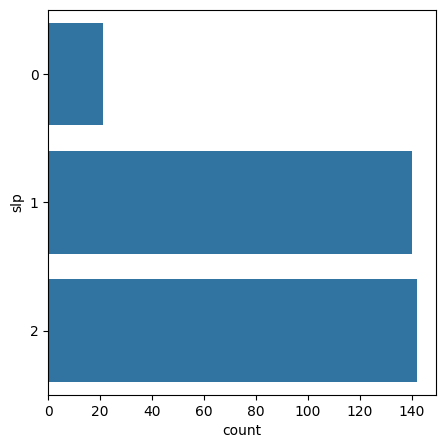

In [12]:
plt.figure(1,(5,5))
sns.countplot(data,y='slp')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

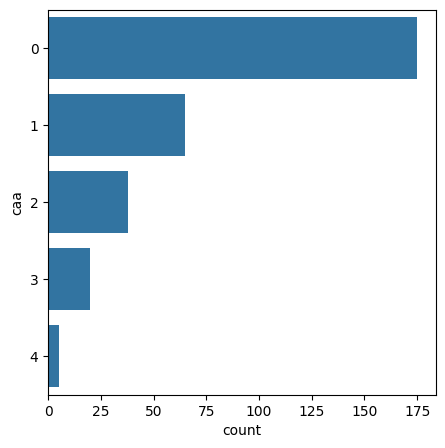

In [13]:
plt.figure(1,(5,5))
sns.countplot(data,y='caa')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

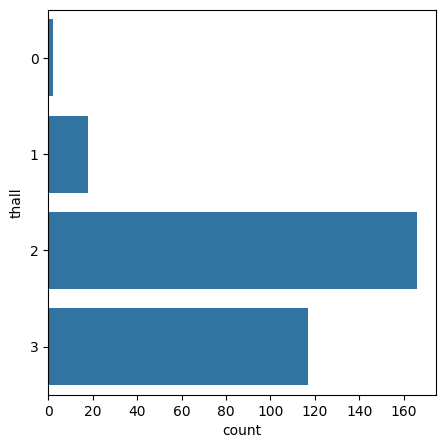

In [14]:
plt.figure(1,(5,5))
sns.countplot(data,y='thall')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

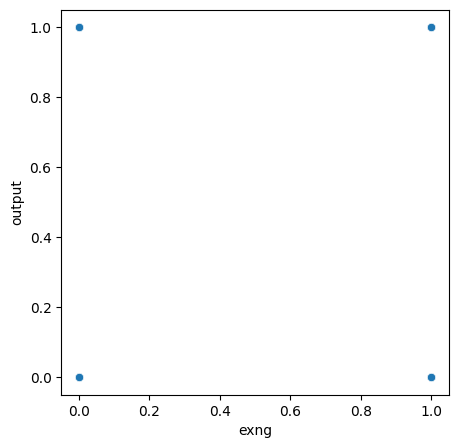

In [15]:
plt.figure(1,(5,5))
sns.scatterplot(data, x='exng',y='output')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

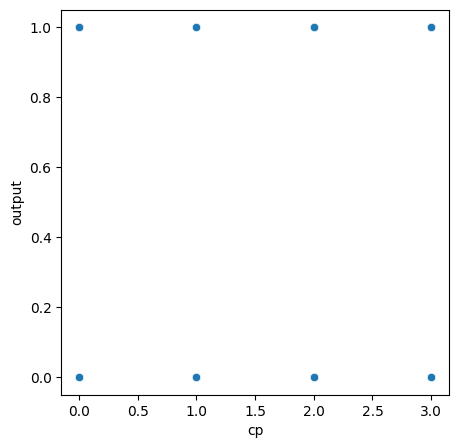

In [16]:
plt.figure(1,(5,5))
sns.scatterplot(data, x='cp',y='output')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

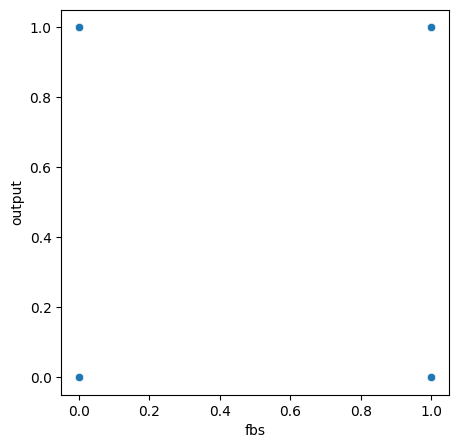

In [17]:
plt.figure(1,(5,5))
sns.scatterplot(data, x='fbs',y='output')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

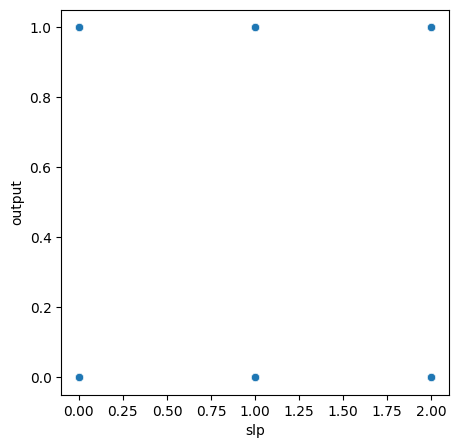

In [18]:
plt.figure(1,(5,5))
sns.scatterplot(data, x='slp',y='output')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

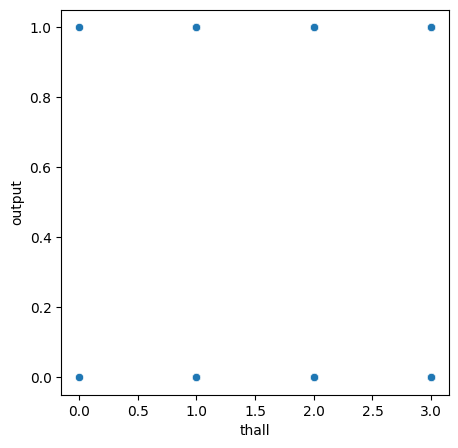

In [19]:
plt.figure(1,(5,5))
sns.scatterplot(data, x='thall',y='output')
plt.show

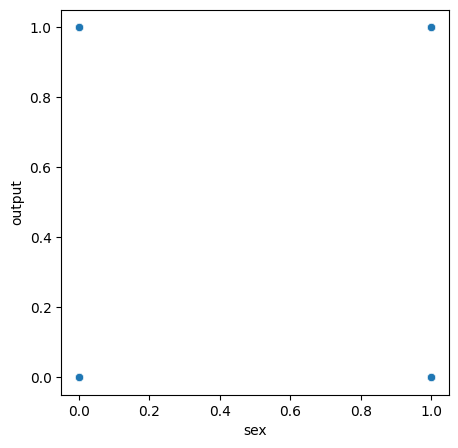

In [20]:
plt.figure(1,(5,5))
sns.scatterplot(data, x='sex',y='output')
plt.show()

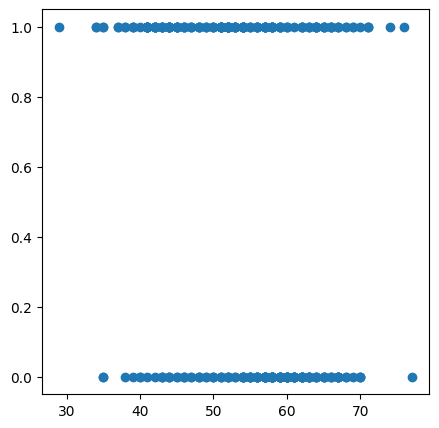

In [21]:
plt.figure(1,(5,5))
plt.scatter(data['age'],data['output'])
plt.show()

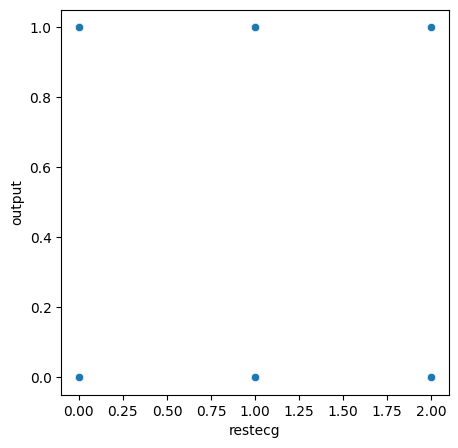

In [22]:
plt.figure(1,(5,5))
sns.scatterplot(data, x='restecg',y='output')
plt.show()

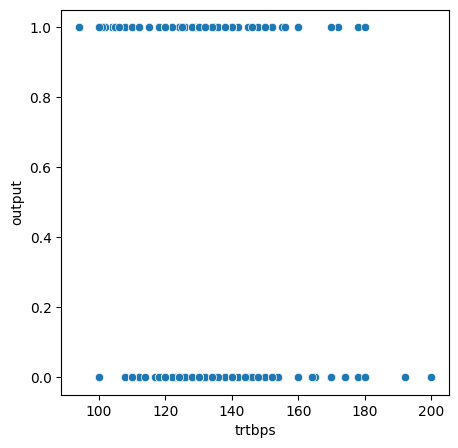

In [23]:
plt.figure(1,(5,5))
sns.scatterplot(data, x='trtbps',y='output')
plt.show()

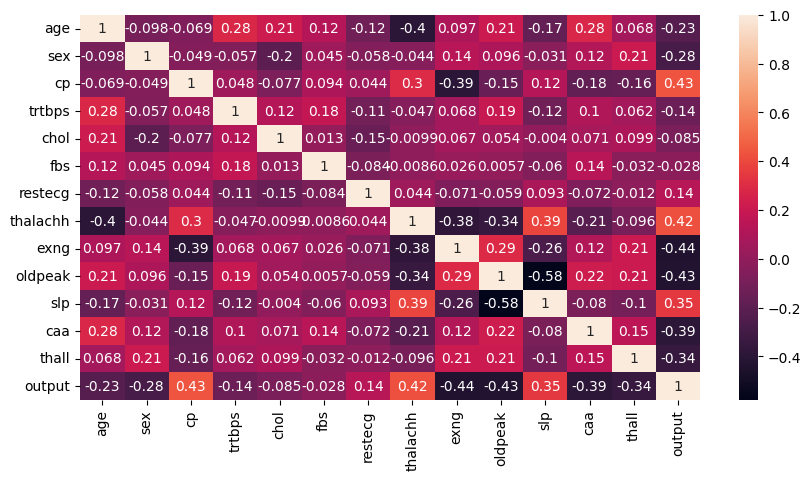

In [24]:
plt.figure(1,(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()


In [86]:
data = data.drop(['oldpeak', 'slp', 'thall'], axis=1)


In [87]:
categorical_variables = ['cp', 'fbs', 'restecg', 'exng', 'caa']

numerical_variables = ['age', 'trtbps', 'chol', 'thalachh']



In [88]:
data = pd.get_dummies(data, columns=categorical_variables)

rb_scaler = RobustScaler()
data[numerical_variables] = rb_scaler.fit_transform(data[numerical_variables])

In [89]:
target_data = data["output"]
input_data = data.drop(["output"],axis=1)

In [90]:
input_data

,age,sex,trtbps,chol,thalachh,cp_0,cp_1,cp_2,cp_3,fbs_0,...,restecg_0,restecg_1,restecg_2,exng_0,exng_1,caa_0,caa_1,caa_2,caa_3,caa_4
0,0.592593,1,0.75,-0.110236,-0.092308,False,False,False,True,False,...,True,False,False,True,False,True,False,False,False,False
1,-1.333333,1,0.00,0.157480,1.046154,False,False,True,False,True,...,False,True,False,True,False,True,False,False,False,False
2,-1.037037,0,0.00,-0.566929,0.584615,False,True,False,False,True,...,True,False,False,True,False,True,False,False,False,False
3,0.074074,1,-0.50,-0.062992,0.769231,False,True,False,False,True,...,False,True,False,True,False,True,False,False,False,False
4,0.148148,0,-0.50,1.795276,0.307692,True,False,False,False,True,...,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0,0.50,0.015748,-0.923077,True,False,False,False,True,...,False,True,False,False,True,True,False,False,False,False
299,-0.740741,1,-1.00,0.377953,-0.646154,False,False,False,True,True,...,False,True,False,True,False,True,False,False,False,False
300,0.962963,1,0.70,-0.740157,-0.369231,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
301,0.148148,1,0.00,-1.716535,-1.169231,True,False,False,False,True,...,False,True,False,False,True,False,True,False,False,False


In [91]:
x = np.array(input_data).astype("float32")
y = np.array(target_data).astype("float32")
y = y.reshape(-1,1)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=.2, random_state=42)


In [93]:
decision_tree = DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_leaf=11,random_state=5)
decision_tree.fit(X_train, y_train)
print("دقت مدل درخت تصمیم روی داده تست:", decision_tree.score(X_test, y_test))


دقت مدل درخت تصمیم روی داده تست: 0.8524590163934426


In [94]:
y_pred1 = decision_tree.predict(X_test)


In [95]:
print (classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix', cmap=plt.colormaps['Blues']):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[28  4]
 [ 5 24]]


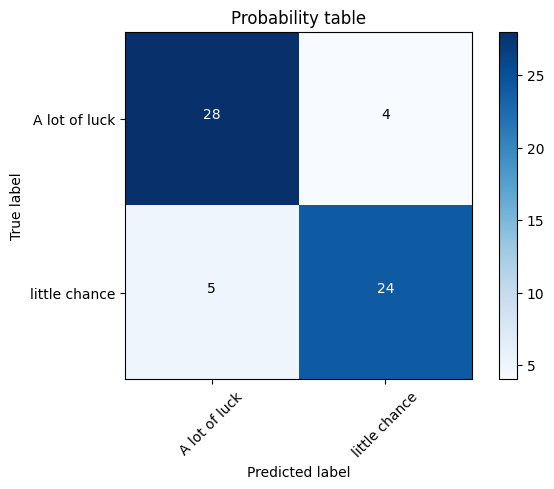

In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred1, labels=[1,0])
np.set_printoptions(precision=4)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['A lot of luck','little chance'],normalize= False,  title='Probability table')
plt.show()

In [96]:

# ساخت خط لوله با ایمپیوت کردن مقادیر گمشده و درخت تصمیم
model = make_pipeline(
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_leaf=11,random_state=5) 
)


In [97]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8524590163934426


In [59]:
y_pred5 = model.predict(X_test)

In [60]:
print (classification_report(y_test,y_pred5))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Confusion matrix, without normalization
[[28  4]
 [ 5 24]]


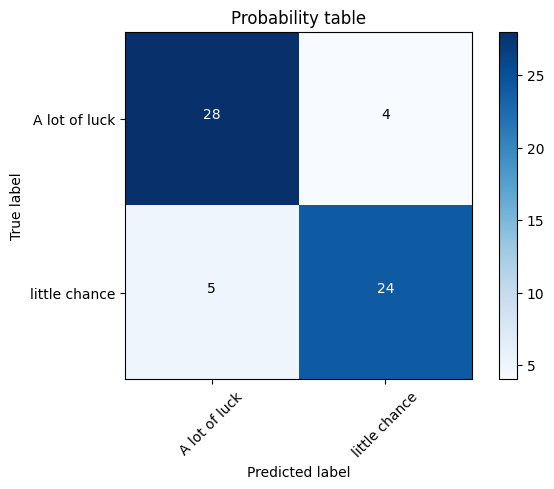

In [61]:
cnf_matrix = confusion_matrix(y_test, y_pred5, labels=[1,0])
np.set_printoptions(precision=4)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['A lot of luck','little chance'],normalize= False,  title='Probability table')
plt.show()

In [62]:
user_inputs = {
    'age': float(input("Please enter age:")),
    'sex': float(input("Please enter sex (male=1, female=0):")),
    'cp': float(input("Type of chest pain (1, 2, 3, 4):")),
    'trtbps': float(input("Resting blood pressure:")),
    'chol': float(input("Blood fat:")),
    'fbs': float(input("Do you have diabetes? (yes=1, no=0):")),
    'restecg': float(input("ECG results at rest (normal=0, Abnormal ECG=1, Large left ventricle=2):")),
    'thalachh': float(input("Maximum heart rate:")),
    'exng': float(input("Does the pain start with a specific activity? (yes=1, no=0):")),
    'caa': float(input("Number of main vessels:"))
}


In [63]:
user_input_df = pd.DataFrame(columns=X_train.columns, data=[user_inputs])
user_input_scaled = rb_scaler.transform(user_input_df[numerical_variables])
user_input_df[numerical_variables] = user_input_scaled

prediction = model.predict(user_input_df)

In [64]:
if prediction==1:
    print('you should see a doctor. Because your chances of heart attack are high')
else:
    print('Is it good. You have a small chance of having a heart attack')

you should see a doctor. Because your chances of heart attack are high
